In [1]:
from eda_imports import *

In [2]:
def q2k(q, delta=100):
    """scale function"""
    return delta / (2 * np.pi) * np.arcsin(2 * q - 1)

In [3]:
def k2q(k, delta=100):
    return (np.sin(2 * np.pi * k / delta) + 1) / 2

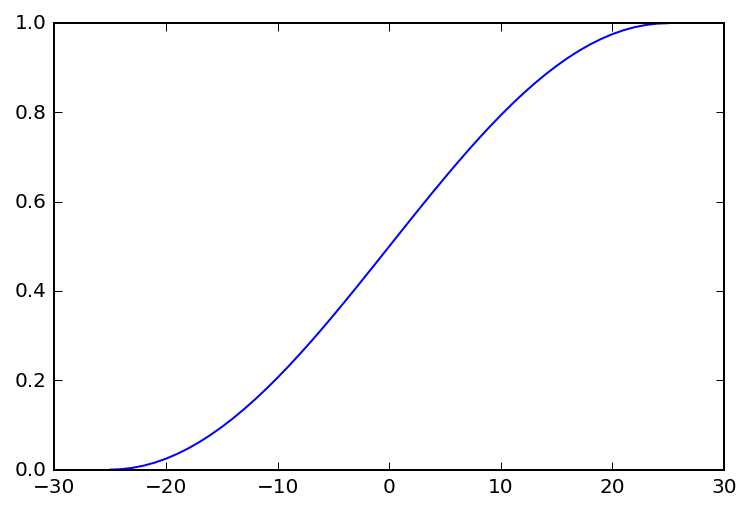

In [4]:
_ks = np.arange(-25, 25 + 1, 1)
plt.plot(_ks, k2q(_ks))

In [5]:
qs = np.arange(0, 1.01, 0.01)

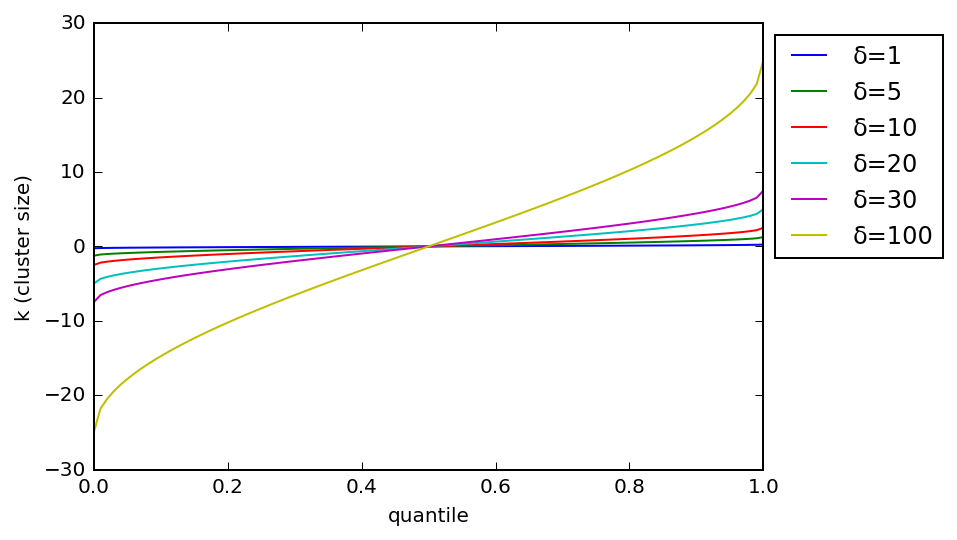

In [6]:
for delta in [1, 5, 10, 20, 30, 100]:
    plt.plot(qs, q2k(qs, delta=delta), label=f"δ={delta}")
    plt.grid()
    plt.xlabel("quantile")
    plt.ylabel("k (cluster size)")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [115]:
samples = np.log(np.random.uniform(size=10000))

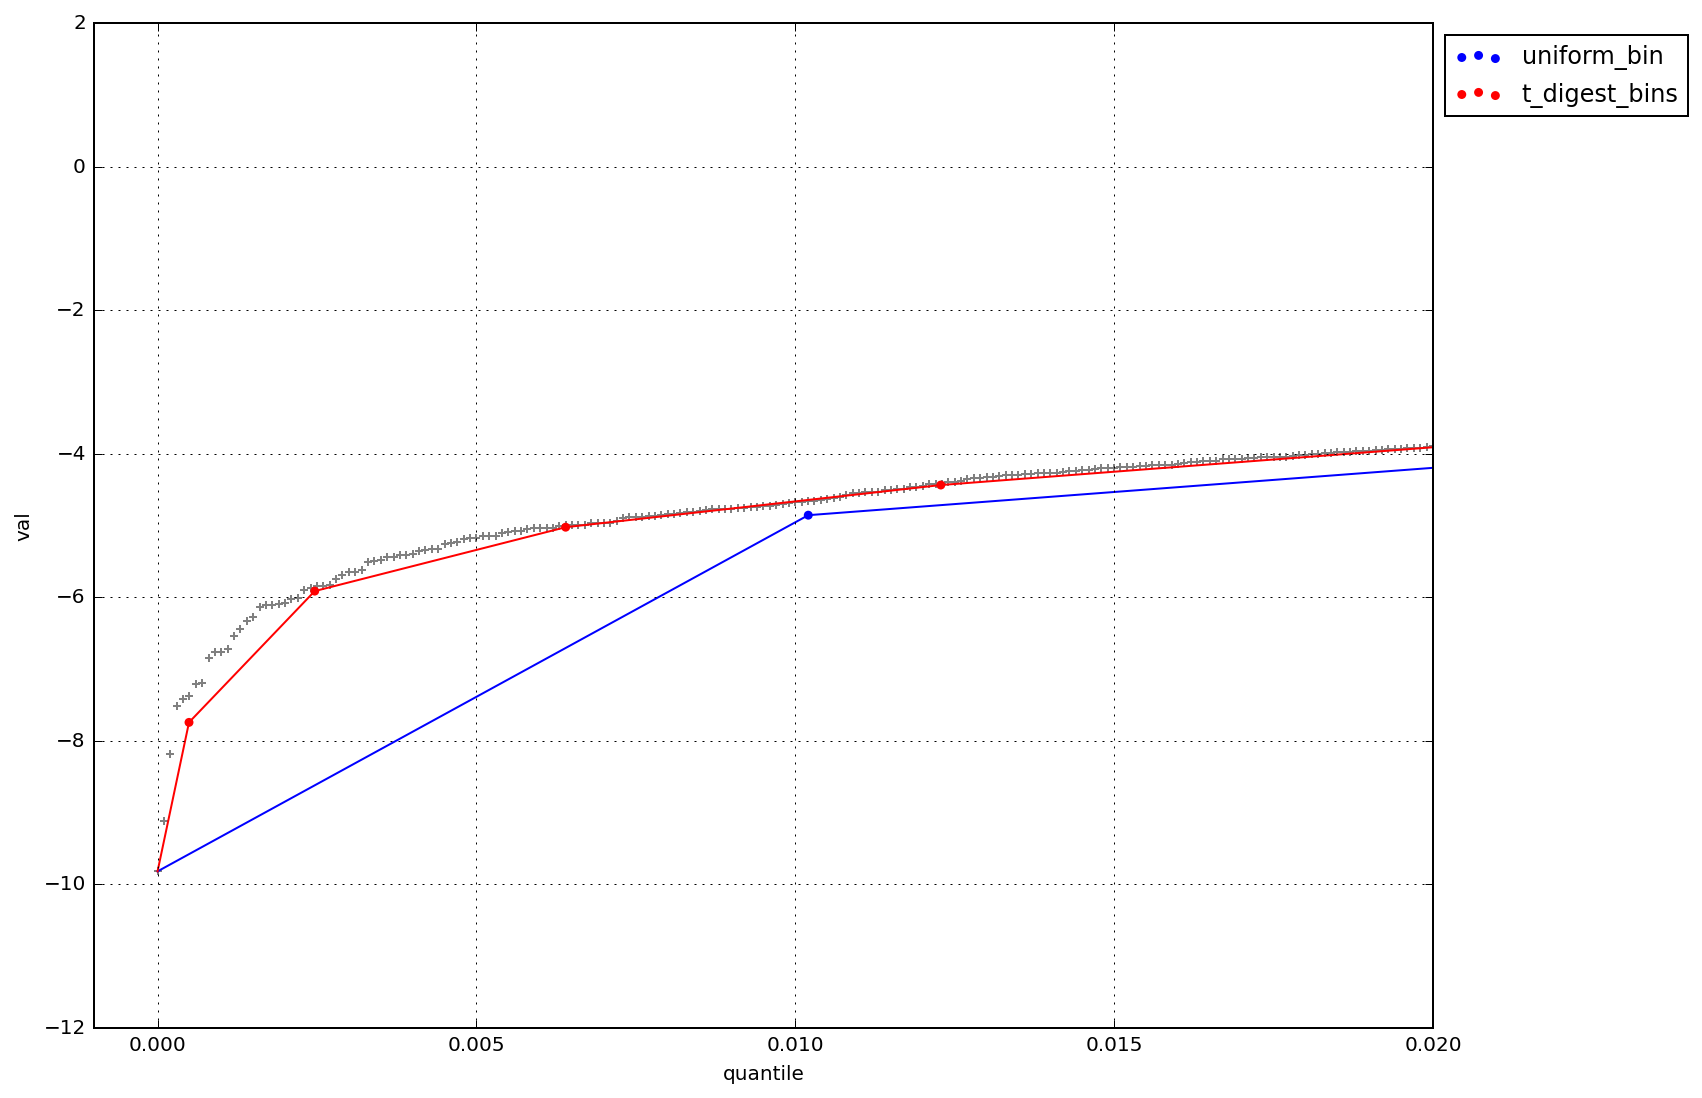

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))

# plot data
ax.scatter(
    np.arange(len(samples)) / len(samples), np.sort(samples), marker="+", color="gray"
)

# # plot true quantiless
# ref_qs = np.arange(0, 1.01, 0.01)
# ref_q_vals = np.quantile(samples, ref_qs)
# ax.scatter(ref_qs, ref_q_vals, label="true quantiles", color="green", edgecolor="none", marker="o", s=100)
# ax.set(xlabel="quantile", ylabel="quantile vals")

# plot uniform quantiles
uniform_q_bins = np.linspace(0, 1, 50)
uniform_qs = (uniform_q_bins[:-1] + uniform_q_bins[1:]) / 2
uniform_bin2q_map = dict(zip(np.arange(len(uniform_q_bins)), uniform_qs))
uniform_q_val_bins = np.quantile(samples, uniform_q_bins)
adf = (
    pd.DataFrame(
        list(zip(np.digitize(samples, uniform_q_val_bins[1:-1]), samples)),
        columns=["bin", "val"],
    )
    .groupby("bin")
    .mean()
    .sort_values("bin")
    .reset_index()
    .assign(quantile=lambda df: df["bin"].replace(uniform_bin2q_map))
)
adf.plot.scatter(
    x="quantile",
    y="val",
    marker="o",
    color="blue",
    edgecolor="none",
    label="uniform_bin",
#     s=60,
    ax=ax,
)

adf_with_head = pd.concat([pd.DataFrame([[0, np.min(samples)]], columns=['quantile', 'val']), adf[["quantile", "val"]]])
for (x1, y1), (x2, y2) in zip(
    adf_with_head.values[1:], adf_with_head.values[:-1]
):
    ax.plot([x1, x2], [y1, y2], color="blue")


# plot t-digest quantiles
delta = 100
ks = np.arange(-delta / 4, delta / 4 + 1, 1)
t_q_bins = k2q(ks)
t_qs = (t_q_bins[:-1] + t_q_bins[1:]) / 2
t_bin2q_map = dict(zip(np.arange(len(t_qs)), t_qs))
t_q_val_bins = np.quantile(samples, t_q_bins)

# t_q_val_bins[1:-1]: to make sure the returned indices are between 0-49
bdf = (
    pd.DataFrame(
        list(zip(np.digitize(samples, t_q_val_bins[1:-1]), samples)),
        columns=["bin", "val"],
    )
    .groupby("bin")
    .mean()
    .sort_values("bin")
    .reset_index()
    .assign(quantile=lambda df: df["bin"].replace(t_bin2q_map))
)
bdf.plot.scatter(
    x="quantile",
    y="val",
    marker="o",
    color="red",
    edgecolor="none",
    label="t_digest_bins",
#     s=30,
    ax=ax,
)

bdf_with_head = pd.concat([pd.DataFrame([[0, np.min(samples)]], columns=['quantile', 'val']), bdf[["quantile", "val"]]])
for (x1, y1), (x2, y2) in zip(
    bdf_with_head.values[1:], bdf_with_head.values[:-1]
):
    ax.plot([x1, x2], [y1, y2], color="red")

ax.set_xlim(-0.001, 0.02)
ax.grid()
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))